IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


IMPORTING WARNINGS

In [2]:
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATASET

In [3]:
data = pd.read_csv("C:\\Users\\archa\\Downloads\\IMDb Movies India.csv\\IMDb Movies India.csv", encoding="latin1" )
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


PRINTING THE FIRST 10 ROWS

In [4]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


RETRIVING THE INFORMATIONS OF THE DATASET

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


DESCRIBING THE DATASET

In [6]:
data.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


PRINTING THE COLUMN NAMES

In [7]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

CHECKING THE NULL VALUES

In [8]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

DATA FILTERING AND PROCESSING

In [9]:
data.shape

(15509, 10)

Rows--> 15509 , Columns--> 10

In [10]:
data["Genre"].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [11]:
data["Rating"].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

DROPPING THE DUPLICATE VALUES

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
col = ["Name" , "Year" , "Duration" , "Votes" , "Rating"]
data.dropna(subset=col, inplace=True)
missing_vals=data.isna().sum()
print(missing_vals)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


DATASET AFTER DROPPING THE DUPLICATES

In [14]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


MOVIE NAME AND RATING COLUMN

In [16]:
movie_rating = data[["Name", "Rating"]]
movie_rating.head(10)

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
9,@Andheri,4.0
10,1:1.6 An Ode to Lost Love,6.2
11,1:13:7 Ek Tera Saath,5.9
12,100 Days,6.5
13,100% Love,5.7


VISUALIZING THE TOP 10 MOVIES

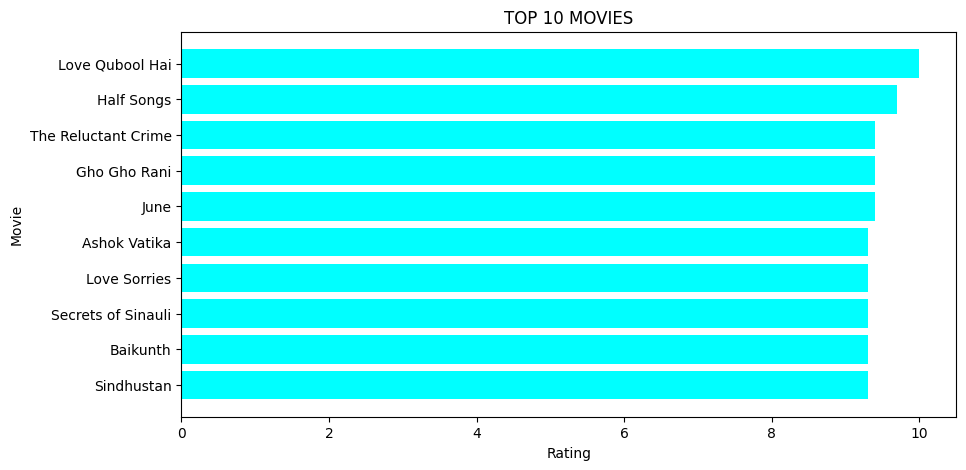

In [17]:
top_movies = data.sort_values(by="Rating", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top_movies["Name"], top_movies["Rating"], color="cyan")
plt.xlabel("Rating")
plt.ylabel("Movie")
plt.title("TOP 10 MOVIES")
plt.gca().invert_yaxis()
plt.show()

COMPARING RATING AND VOTES

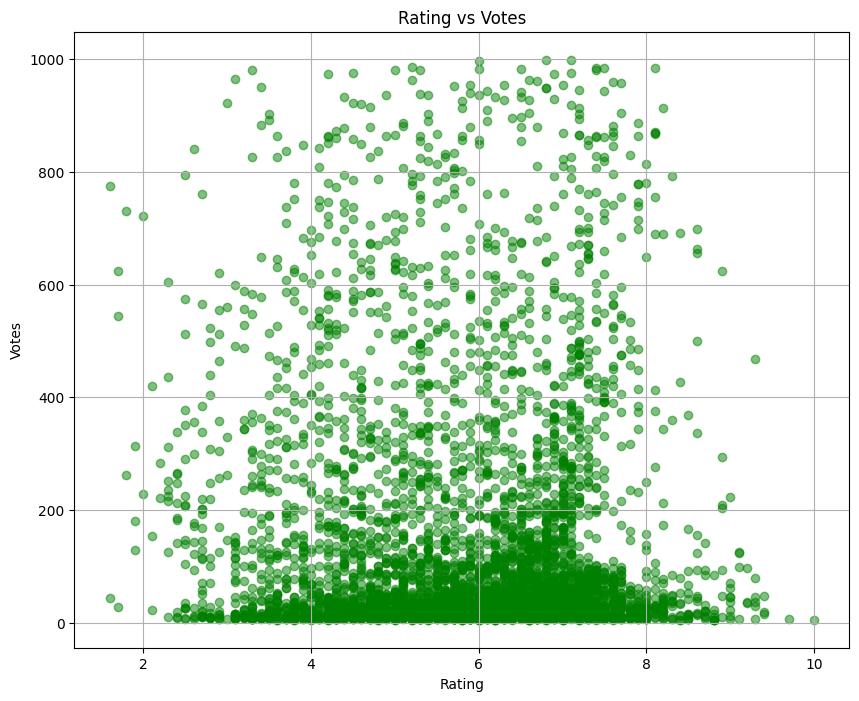

In [18]:
data["Votes"]=pd.to_numeric(data["Votes"], errors="coerce")
plt.figure(figsize=(10,8))
plt.scatter(data["Rating"], data["Votes"], alpha=0.5, color="green")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Rating vs Votes")
plt.grid(True)
plt.show()

VISUALIZING TOP 10 MOVIES

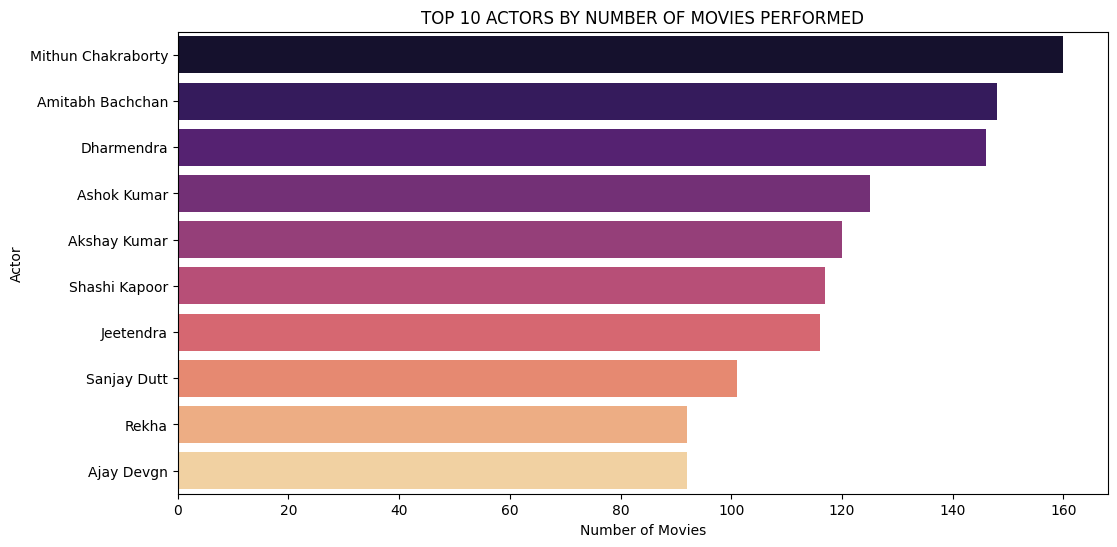

In [19]:
actors = pd.concat([data["Actor 1"], data["Actor 2"], data["Actor 3"]])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ["Actor", "Number of Movies"]
plt.figure(figsize = (12,6))
sns.barplot(x="Number of Movies", y="Actor", data=actor_counts.head(10), palette="magma")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("TOP 10 ACTORS BY NUMBER OF MOVIES PERFORMED")
plt.show()

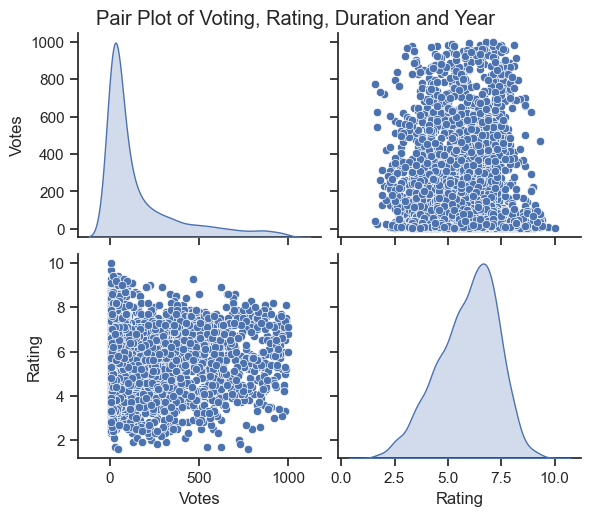

In [33]:
columns_of_interest=["Votes", "Rating", "Duration", "Year"]
sns.set(style="ticks")
sns.pairplot(data[columns_of_interest], diag_kind="kde", markers="o" , palette="magma", height=2.5, aspect=1.2)
plt.suptitle("Pair Plot of Voting, Rating, Duration and Year", y=1.02)
plt.show()

CORRELATION HEATMAP

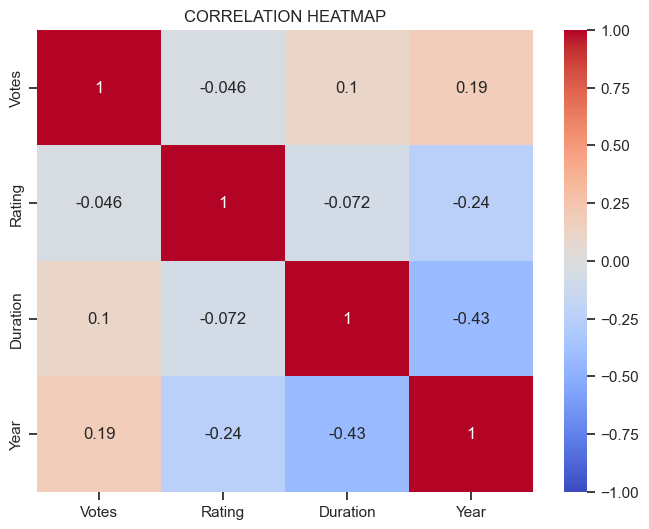

In [56]:
nm_cols=["Votes", "Rating", "Duration", "Year"]
corr_mat=data[nm_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot = True, cmap="coolwarm", vmin = -1, vmax = 1)
plt.title("CORRELATION HEATMAP")
plt.show()

FEATURE ENGINEERING

In [36]:
sorted_data=data.sort_values(by="Votes", ascending=False)
sorted_data["Vote_Count_Percentile"]=sorted_data["Votes"].rank(pct=True)*100
sorted_data.reset_index(drop=True, inplace= True)
print(sorted_data[["Name","Votes", "Vote_Count_Percentile"]])


                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [37]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


DROPPING THE NULL COLUMNS

In [39]:
data=data.dropna(subset=["Votes"])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


MODEL TRAINING AND TESTING

SPLITING THE DATASET INTO 2 PARTS (TRAINING - 80% , TESTING - 20%)

In [40]:
data["Year"]=data["Year"].astype(str)
data["Duration"]=data["Duration"].astype(str)
data["Year"]=data["Year"].str.extract("(\d+)").astype(float)
data["Duration"]=data["Duration"].str.extract("(\d+)").astype(float)
x=data[["Year","Duration","Votes"]]
y=data["Rating"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

MODEL TRAINING

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

MODEL TESTING AND PREDICTION

In [43]:
y_pred = model.predict(x_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

meab = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MEAN ABSOLUTE ERRR : {meab}")
print(f"ROOT MEAN SQUARED ERROR : {rmse}")
print(f"R-SQUARED (R2) SCORE : {r2}")


MEAN ABSOLUTE ERRR : 1.0848311387601355
ROOT MEAN SQUARED ERROR : 1.3484226346477912
R-SQUARED (R2) SCORE : 0.0981216384029091


VISUALIZING THE PREDICTION RESULT

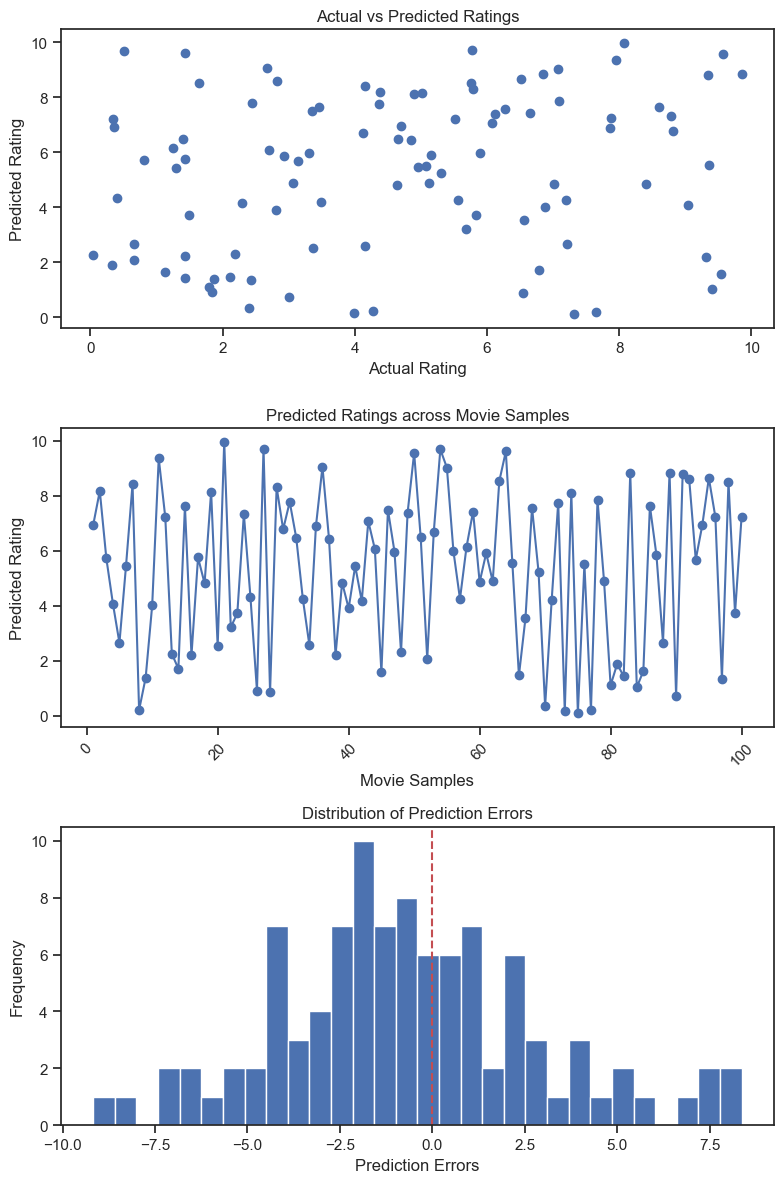

In [55]:
y_test = np.random.rand(100)*10
y_pred = np.random.rand(100)*10
errors = y_test - y_pred
fig, axs = plt.subplots(3,1, figsize = (8,12))

axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual Rating")
axs[0].set_ylabel("Predicted Rating")
axs[0].set_title("Actual vs Predicted Ratings")

movie_samp=np.arange(1, len(y_pred)+1)
axs[1].plot(movie_samp, y_pred, marker="o", linestyle="-")
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Rating")
axs[1].set_title("Predicted Ratings across Movie Samples")
axs[1].tick_params(axis = "x", rotation = 45)

axs[2].hist(errors, bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0, color="r", linestyle="--")
plt.tight_layout()
plt.show()
